In [1]:
import numpy as np
import scipy
from scipy import stats
from astropy.io import fits
south_list = fits.open('goodss_3dhst.v4.1.cat.FITS', memmap=True)
south_data = south_list[1].data
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pha_list = fits.open('3dhst.v4.1.4.full.v1.fits', memmap=True)
pha_data = pha_list[1].data
import numpy.ma as ma

def magab_err(flux, error):
    if (np.absolute(error)) >= flux:
        return 1.085
    else:
        return np.absolute((-1.085)* (error/flux))
    
def magab(flux, error):
    if error > flux:
        return (((-2.5)*(np.log10(error))) + 25 )
    else:
        return (((-2.5)*(np.log10(flux))) + 25 )

magfunc = np.vectorize(magab)
magerrorfunc = np.vectorize(magab_err)

In [2]:
print scipy.stats.itemfreq(pha_data['id'][113358:163865] == south_data['id'])
south_phot_use_1= (south_data['use_phot']==1)
print scipy.stats.itemfreq((south_data['use_phot']==1))

[[    1 50507]]
[[    0 10509]
 [    1 39998]]


In [5]:
def cutter (a, a_err, b, b_err, c, c_err): 
    return (((magfunc(a, a_err)- magfunc(b, b_err) >(0.44 + (((magerrorfunc(a, a_err))**2) + ((magerrorfunc(b, b_err))**2))**.5)) & 
(magfunc(c, c_err)- magfunc(b, b_err) >(0.44 + (((magerrorfunc(c, c_err))**2) + ((magerrorfunc(b, b_err))**2))**.5))) & south_phot_use_1 & ((a>=0)& (b>=0) & (c>=0)) & (((a/a_err)>3)&((b/b_err)>3)&((c/c_err)>3)))
#& (((a/a_err)>3)&((b/b_err)>3)&((c/c_err)>3))

In [6]:
###jhk selection###
afils = [south_data['f_j'], south_data['e_j'], south_data['f_tenisj'], south_data['e_tenisj'], south_data['f_f125w'],south_data['e_f125w']]
bfils= [south_data['f_f160w'], south_data['e_f160w'], south_data['f_h'], south_data['e_h']]
cfils= [south_data['f_tenisK'], south_data['e_tenisK'], south_data['f_ks'], south_data['e_ks']]

for a in range(0,3):
    for b in range (0,2):
        for c in range (0,2):
            globals()['south_jhk%d%d%d' %(a,b,c)] = (cutter(afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]))

for a in range(0,3):
    for b in range (0,2):
        for c in range (0,2):
            print "south_jhk%d%d%d"%(a,b,c), np.count_nonzero((globals()['south_jhk%d%d%d' %(a,b,c)])==1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:22: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: divide by zero encountered in log10


south_jhk000 5
south_jhk001 8
south_jhk010 16
south_jhk011 9
south_jhk100 7
south_jhk101 8
south_jhk110 20
south_jhk111 6
south_jhk200 6
south_jhk201 7
south_jhk210 24
south_jhk211 8


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


In [7]:
south_data['id'][south_jhk200|south_jhk201]

array([  593,  4527, 13104, 13567, 14777, 24699, 28104, 29345, 38584], dtype=int64)

In [9]:
###ijh selection###
afils= [south_data['f_I'], south_data['e_I'], south_data['f_f775W'], south_data['e_f775W'], south_data['f_f814Wcand'], south_data['e_f814Wcand']]
bfils = [south_data['f_j'], south_data['e_j'], south_data['f_tenisj'], south_data['e_tenisj'], south_data['f_f125w'],south_data['e_f125w']]
cfils= [south_data['f_f160w'], south_data['e_f160w'], south_data['f_h'], south_data['e_h']]

for a in range(0,3):
    for b in range (0,3):
        for c in range (0,2):
            globals()['south_ijh%d%d%d' %(a,b,c)] = (cutter(afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]))

for a in range(0,3):
    for b in range (0,3):
        for c in range (0,2):
            print "south_ijh%d%d%d"%(a,b,c), np.count_nonzero((globals()['south_ijh%d%d%d' %(a,b,c)])==1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:22: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: divide by zero encountered in log10


south_ijh000 8
south_ijh001 1
south_ijh010 11
south_ijh011 4
south_ijh020 4
south_ijh021 2
south_ijh100 272
south_ijh101 4
south_ijh110 172
south_ijh111 9
south_ijh120 42
south_ijh121 8
south_ijh200 327
south_ijh201 4
south_ijh210 198
south_ijh211 10
south_ijh220 46
south_ijh221 8


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


In [ ]:
afils= [south_data['f_I'], south_data['e_I'], south_data['f_f775W'], south_data['e_f775W'], south_data['f_f814Wcand'], south_data['e_f814Wcand']]
bfils = [south_data['f_j'], south_data['e_j'], south_data['f_tenisj'], south_data['e_tenisj'], south_data['f_f125w'],south_data['e_f125w']]
cfils= [south_data['f_f160w'], south_data['e_f160w'], south_data['f_h'], south_data['e_h']]

for a in range(0,6):
        for b in range (0,6):
            for c in range (0,3):
                f1,f1e, f2, f2e, f3, f3e = afils[2*a], afils[1+(cutter2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]
                plt.figure(figsize=(10,6))
                matplotlib.pyplot.scatter((magfunc(f2, f2e)- magfunc(f3, f3e)), (magfunc(f1, f1e)- magfunc(f2, f2e)) , 
                              c=['r' if value else 'k' for value in globals()['south_jhk%d%d%d' %(a,b,c)]], 
                              s= [50 if x==1&y==1 else 50 if x==1 else 50 if y==1 else 0.1 for x, y in zip(globals()['cosmos_jhk%d%d%d' %(a,b,c)],((((pha_data['z_spec']>1.75)&(pha_data['z_spec']<2.65)) | ((pha_data['z_peak']>1.75)&(pha_data['z_peak']<2.6))) & (((pha_data['OIII_EQW'] + pha_data['HBETA_EQW']) > 500) | (pha_data['HALPHA_EQW'] > 500))))])
                plt.xlim(-5,5)
                plt.ylim(-1,5)
                plt.xlabel("$cosmos_jhk%d%d%d$"%(a,b,c), fontsize=16)
                plt.title('$Cosmos JHK$', fontsize=20)

In [11]:
print (south_data['id'][south_ijh120|south_ijh220])

[ 2402  2443  2888  3470  3783  4516  4925  5012 10416 10834 12392 12416
 12719 12913 13625 14546 16027 18268 18636 19680 19688 21024 21672 25385
 25804 27809 27831 30069 32147 32155 32241 33131 33136 34654 34706 35395
 35675 36337 38780 39643 39882 40539 40899 43394 43561 43666 43693 43910
 46676]


In [14]:
###vz--jhk selection###
bfils = [south_data['f_F850LP'], south_data['e_F850LP'],south_data['f_F850LPcand'], south_data['e_F850LPcand']]
cfils= [south_data['f_j'], south_data['e_j'], south_data['f_tenisj'], south_data['e_tenisj'],south_data['f_f125w'],south_data['e_f125w'], south_data['f_f140w'], south_data['e_f140w'],south_data['f_f160w'], south_data['e_f160w'], south_data['f_h'], south_data['e_h'], south_data['f_tenisk'],south_data['e_tenisk'], south_data['f_ks'], south_data['e_ks']]
afils= [south_data['f_v'], south_data['e_v'], south_data['f_F606W'], south_data['e_F606W'],south_data['f_F606Wcand'], south_data['e_F606Wcand']]

for a in range(0,3):
    for b in range (0,2):
        for c in range (0,8):
            globals()['south_vz%d%d%d' %(a,b,c)] = (cutter(afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]))

for a in range(0,3):
    for b in range (0,2):
        for c in range (0,8):
            print "south_vz%d%d%d"%(a,b,c), np.count_nonzero((globals()['south_vz%d%d%d' %(a,b,c)])==1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: divide by zero encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:22: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


south_vz000 8
south_vz001 3
south_vz002 2
south_vz003 8
south_vz004 21
south_vz005 2
south_vz006 1
south_vz007 3
south_vz010 37
south_vz011 33
south_vz012 109
south_vz013 46
south_vz014 154
south_vz015 6
south_vz016 18
south_vz017 13
south_vz100 6
south_vz101 3
south_vz102 4
south_vz103 7
south_vz104 25
south_vz105 2
south_vz106 1
south_vz107 3
south_vz110 38
south_vz111 31
south_vz112 175
south_vz113 50
south_vz114 345
south_vz115 7
south_vz116 16
south_vz117 14
south_vz200 1
south_vz201 2
south_vz202 2
south_vz203 4
south_vz204 8
south_vz205 1
south_vz206 1
south_vz207 1
south_vz210 16
south_vz211 10
south_vz212 77
south_vz213 17
south_vz214 141
south_vz215 4
south_vz216 5
south_vz217 7


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: RuntimeWarning: overflow encountered in square
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:29: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:31: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:32: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:33: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:34: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:35: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:36: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:56: RuntimeWarning: invalid value enco

7
5
4


(0, 2000)

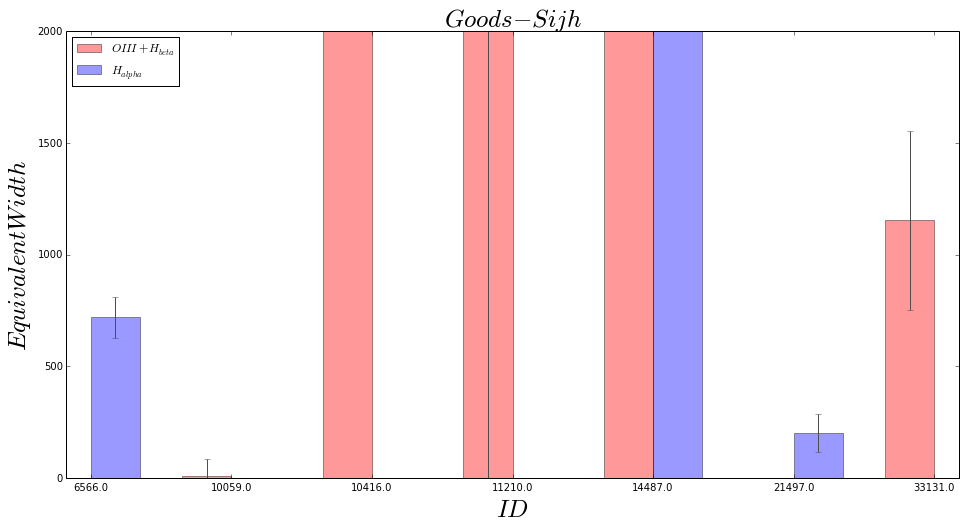

In [22]:
south_oxy = pha_data['OIII_EQW'][113358:163865]
south_hbeta = pha_data['HBETA_EQW'][113358:163865]
south_eqw_sum = south_oxy + south_hbeta
south_eqw_err_1 = (pha_data['OIII_EQW_ERR'][113358:163865])**2
south_eqw_err_2 = (pha_data['HBETA_EQW_ERR'][113358:163865])**2
south_eqw_err_net = (south_eqw_err_1 + south_eqw_err_2)**0.5


current_cut = (south_ijh000|
south_ijh001|
south_ijh010|
south_ijh011|
south_ijh020|
south_ijh021|
south_ijh100|
south_ijh101|
south_ijh110|
south_ijh111|
south_ijh120|
south_ijh121|
south_ijh200|
south_ijh201|
south_ijh210|
south_ijh211|
south_ijh220|
south_ijh221)
#insert cut above
plt.figure(figsize=(16,8))
n_groups = len(south_eqw_sum[(current_cut == 1)&((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))])
print n_groups
print np.count_nonzero(((current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >500) | (south_eqw_sum>500)))==1)
print np.count_nonzero(((current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >1000) | (south_eqw_sum>1000)))==1)
means_men = south_eqw_sum[(current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))]
std_men = south_eqw_err_net[(current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))]
means_women = pha_data['HALPHA_EQW'][113358:163865][(current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))]
std_women = pha_data['HALPHA_EQW_ERR'][113358:163865][(current_cut == 1) & ((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))]
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_men,
                 error_kw=error_config,
                 label='$OIII + H_{beta}$')
rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_women,
                 error_kw=error_config,
                 label='$H_{alpha}$')
plt.xlabel('$ID$', fontsize = 25 )
plt.ylabel('$Equivalent Width$', fontsize = 25)
plt.title('$Goods-S ijh} $', fontsize = 25)
plt.xticks(index + bar_width, pha_data['id'][113358:163865][(current_cut == 1)&((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))])
plt.yticks(np.arange(0, max(means_men), 500 ))
plt.legend(loc='upper left')
plt.axis('tight')
plt.ylim(0,2000)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: RuntimeWarning: overflow encountered in square
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:23: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:25: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:26: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:27: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:28: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:29: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:30: RuntimeWarning: invalid value encountered in greater
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:50: RuntimeWarning: invalid value enco

7
6
6


(0, 2000)

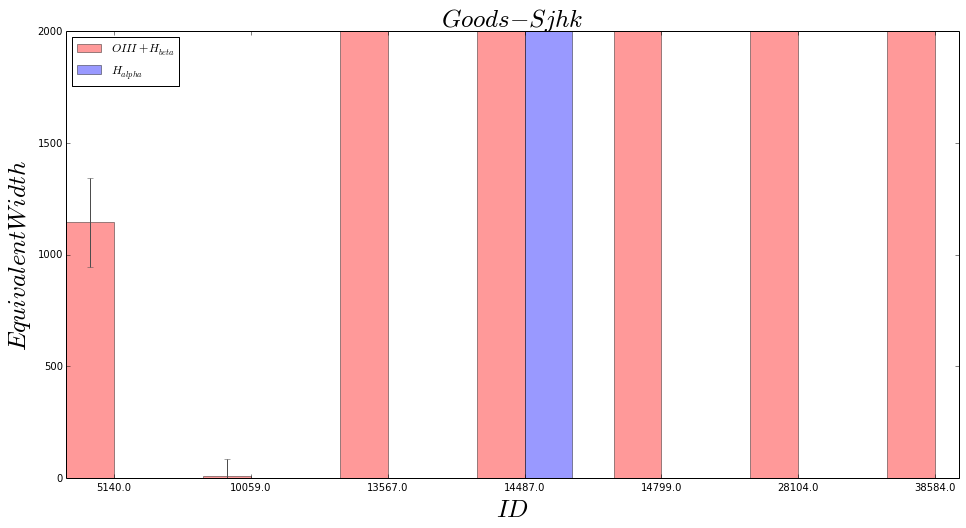

In [24]:
south_oxy = pha_data['OIII_EQW'][113358:163865]
south_hbeta = pha_data['HBETA_EQW'][113358:163865]
south_eqw_sum = south_oxy + south_hbeta
south_eqw_err_1 = (pha_data['OIII_EQW_ERR'][113358:163865])**2
south_eqw_err_2 = (pha_data['HBETA_EQW_ERR'][113358:163865])**2
south_eqw_err_net = (south_eqw_err_1 + south_eqw_err_2)**0.5


current_cut = (south_jhk000|
south_jhk001|
south_jhk010|
south_jhk011|
south_jhk100|
south_jhk101|
south_jhk110|
south_jhk111|
south_jhk200|
south_jhk201|
south_jhk210|
south_jhk211)
#insert cut above
plt.figure(figsize=(16,8))
n_groups = len(south_eqw_sum[(current_cut == 1)&((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))])
print n_groups
print np.count_nonzero(((current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >500) | (south_eqw_sum>500)))==1)
print np.count_nonzero(((current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >1000) | (south_eqw_sum>1000)))==1)
means_men = south_eqw_sum[(current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))]
std_men = south_eqw_err_net[(current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))]
means_women = pha_data['HALPHA_EQW'][113358:163865][(current_cut == 1)& ((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))]
std_women = pha_data['HALPHA_EQW_ERR'][113358:163865][(current_cut == 1) & ((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))]
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_men,
                 error_kw=error_config,
                 label='$OIII + H_{beta}$')
rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_women,
                 error_kw=error_config,
                 label='$H_{alpha}$')
plt.xlabel('$ID$', fontsize = 25 )
plt.ylabel('$Equivalent Width$', fontsize = 25)
plt.title('$Goods-S jhk} $', fontsize = 25)
plt.xticks(index + bar_width, pha_data['id'][113358:163865][(current_cut == 1)&((pha_data['HALPHA_EQW'][113358:163865] >0) | (south_eqw_sum>0))])
plt.yticks(np.arange(0, max(means_men), 500 ))
plt.legend(loc='upper left')
plt.axis('tight')
plt.ylim(0,2000)

In [30]:
south_eqw_sum[south_data['id']==13567]

array([ 2623.44995117], dtype=float32)

In [36]:
print south_jhk210[10058]
print south_jhk110[10058]

True
True


In [40]:
print south_data['f_tenisj'][10058]
print south_data['f_f125w'][10058]
print south_data['f_h'][10058]
print south_data['f_tenisk'][10058]
print south_data['f_f160w'][10058]
print south_data['e_h'][10058]
print south_data['e_f160w'][10058]

6.972945
3.259777
13.801692
3.685334
4.132257
0.297913
0.180749


In [41]:
###ihk selection###
afils= [south_data['f_I'], south_data['e_I'], south_data['f_f775W'], south_data['e_f775W'], south_data['f_f814Wcand'], south_data['e_f814Wcand']]
bfils = [south_data['f_f160w'], south_data['e_f160w'], south_data['f_h'], south_data['e_h']] 
cfils= [south_data['f_tenisK'], south_data['e_tenisK'], south_data['f_ks'], south_data['e_ks']]

for a in range(0,3):
    for b in range (0,2):
        for c in range (0,2):
            globals()['south_ihk%d%d%d' %(a,b,c)] = (cutter(afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]))

for a in range(0,3):
    for b in range (0,2):
        for c in range (0,2):
            print "south_ihk%d%d%d"%(a,b,c), np.count_nonzero((globals()['south_ihk%d%d%d' %(a,b,c)])==1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:22: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: divide by zero encountered in log10


south_ihk000 5
south_ihk001 13
south_ihk010 18
south_ihk011 7
south_ihk100 7
south_ihk101 18
south_ihk110 30
south_ihk111 15
south_ihk200 8
south_ihk201 18
south_ihk210 29
south_ihk211 15


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


In [42]:
print (south_data['id'][south_ihk100|south_ihk101|south_ihk200|south_ihk201])

[  593   627  4527  5140  9612 12534 12811 13104 13567 13597 14487 14777
 14799 17462 20321 24699 28104 29345 30427 38584 41194 45699 46560]


In [43]:
###vij selection###
cfils = [south_data['f_j'], south_data['e_j'], south_data['f_tenisj'], south_data['e_tenisj'], south_data['f_f125w'],south_data['e_f125w']]
bfils= [south_data['f_I'], south_data['e_I'], south_data['f_f775W'], south_data['e_f775W'], south_data['f_f814Wcand'], south_data['e_f814Wcand']]
afils= [south_data['f_v'], south_data['e_v'], south_data['f_F606W'], south_data['e_F606W'],south_data['f_F606Wcand'], south_data['e_F606Wcand']]

for a in range(0,3):
    for b in range (0,3):
        for c in range (0,3):
            globals()['south_vij%d%d%d' %(a,b,c)] = (cutter(afils[2*a], afils[1+(2*a)], bfils[2*b], bfils[1+(2*b)], cfils[2*c], cfils[1+(2*c)]))

for a in range(0,3):
    for b in range (0,3):
        for c in range (0,3):
            print "south_vij%d%d%d"%(a,b,c), np.count_nonzero((globals()['south_vij%d%d%d' %(a,b,c)])==1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: divide by zero encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:24: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:22: RuntimeWarning: invalid value encountered in log10
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


south_vij000 24
south_vij001 17
south_vij002 164
south_vij010 6
south_vij011 11
south_vij012 24
south_vij020 2
south_vij021 4
south_vij022 13
south_vij100 24
south_vij101 14
south_vij102 190
south_vij110 5
south_vij111 10
south_vij112 20
south_vij120 2
south_vij121 3
south_vij122 16
south_vij200 12
south_vij201 6
south_vij202 68
south_vij210 2
south_vij211 6
south_vij212 8
south_vij220 0
south_vij221 1
south_vij222 3


In [44]:
print (south_data['id'][south_vij112|south_vij122|south_vij212|south_vij222])

[  976  5419  5447  5522  7489  8278  8402  9324  9638 10030 10616 12949
 13657 13763 21538 26468 26580 29877 32739 32893 36982 38834 40132 40330
 40578 40718 41608 42045 43217 43580 43613 43711 50051 50307 50373]
